# Kumar Gaurav Research Work

In [1]:
import pandas as pd
import numpy as np

In [2]:
import re
import seaborn as sns


In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.simplefilter("ignore")

### working with Language Detection dataset

### Aim to detect any language script

In [5]:
data = pd.read_csv("Language Detection.csv")

In [13]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [14]:
data.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [6]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [7]:
X = data["Text"]
y = data["Language"]

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
data_list = []

In [10]:
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)

In [11]:
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [12]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [15]:
#model creation and prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [16]:
# prediction 
y_pred = model.predict(x_test)

In [17]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

## Finally got , high accuracy

In [18]:
ac  # accuracy 

0.973404255319149

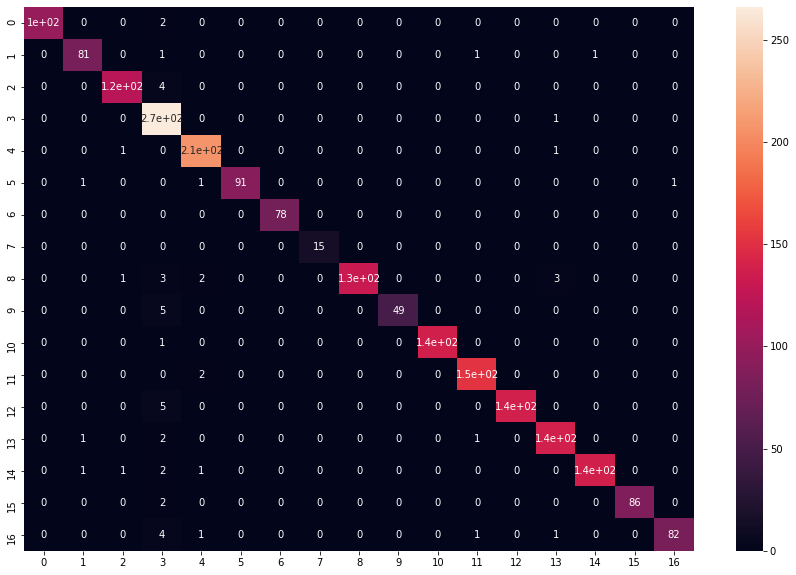

In [21]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [22]:
# function for predicting language
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

##  language detection successfully work

In [24]:
# English
predict("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals")


The langauge is in English


In [25]:
# Malayalam
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam


In [26]:
# French
predict("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")

The langauge is in French


In [27]:
# Arabic
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")

The langauge is in Arabic


In [28]:
# Malayalam
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam


In [29]:
# Russian
predict("Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The langauge is in Russian
